In [1]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt

In [2]:
x_p = np.array(list(sp.primerange(1, 100)))
y_0 = np.zeros(len(x_p))
x_p

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29])

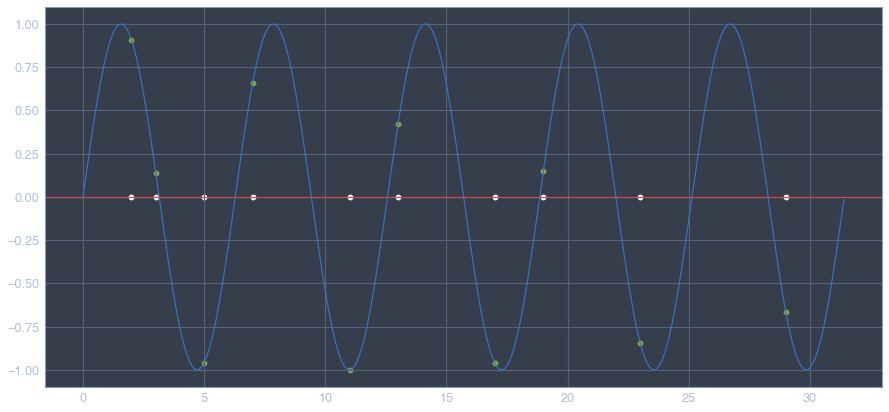

In [57]:
x = np.arange(0, 10*np.pi, 0.1)

fig, ax = plt.subplots(1, figsize=(15, 7))
ax.plot(x, np.sin(x))
ax.axhline(y=0, c='r')
ax.scatter(x_p, np.sin(x_p), c='g')
ax.scatter(x_p, np.sin(np.pi*x_p), c='w')

In [2]:
def calc__i_sp(n_um):
    i_sp = 1
    for v1 in range(2, int(np.floor(np.sqrt(n_um)))):
        i_sp *= 1 - np.floor(2**-np.abs(np.floor(n_um/v1) - n_um/v1))

    return i_sp


def calc__n_p(n):
    n_p = 0
    for v2 in range(2, int(np.ceil(np.e*n*np.log(n)))):
        n_p += np.floor(
            1
            /
            (
                np.floor(2**(sum([calc__i_sp(v3)-n for v3 in range(2, v2)])))
                + 1
            )
        ) + 2
    
    return n_p


def calc__p_tonb(n_um):
    p_tonb = 0
    for v4 in range(2, n_um):
        p_tonb += calc__i_sp(v4)
    
    return p_tonb


def calc__p_tona(n_um):
    return calc__p_tonb(n_um) + 1 - calc__i_sp(n_um)


def calc__s_bet(a, b, x):
    p = np.floor(2**-np.abs(float(b)-float(a)))
    return np.sin(
        (
            (1 - p)*np.pi*(x - a)
        )
        /(
            p + (1 - p)*(b - a)
        )
    ) * (b - a)


def calc__p_sine(x):
    return calc__s_bet(
        calc__n_p(calc__p_tonb(int(np.floor(x)))),
        calc__n_p(calc__p_tona(int(np.ceil(x)))),
        x
    ) * (2 * (calc__p_tonb(int(np.floor(x))) % 2) - 1)



In [38]:
x = np.linspace(3, 25, 200)

In [39]:
y = np.array([])
for x_i in x:
    y = np.append(y, calc__p_sine(x_i))

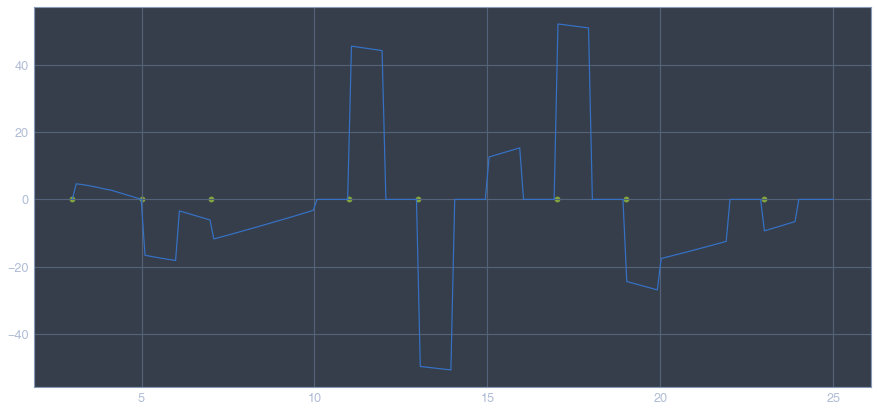

In [40]:
fig, ax = plt.subplots(1, figsize=(15, 7))
ax.plot(x, y)
ax.scatter([3, 5, 7, 11, 13, 17, 19, 23], np.zeros(8), c='g')